In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# from pykalman import KalmanFilter
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import signal
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
import datetime
plt.style.use('ggplot')

# `Importing Clean Data` 

In [2]:
walkSit = []
walkFall = []
runFall = []
downSit = []
freeFall = []
# runSit = []

for i in range(47):
    walkSit.append(pd.read_csv("Data/Cleaned/walkSit/walkSit{}.csv".format(i + 1), sep = ';'))

for i in range(48):    
    walkFall.append(pd.read_csv("Data/Cleaned/walkFall/walkFall{}.csv".format(i + 1), sep = ';'))
       
for i in range(45):    
    runFall.append(pd.read_csv("Data/Cleaned/runFall/runFall{}.csv".format(i + 1), sep = ';'))
    
for i in range(33):    
    downSit.append(pd.read_csv("Data/Cleaned/downSit/downSit{}.csv".format(i + 1), sep = ';'))

for i in range(15):    
    freeFall.append(pd.read_csv("Data/Cleaned/freeFall/freeFall{}.csv".format(i + 1), sep = ';'))

# `Plotting important data`

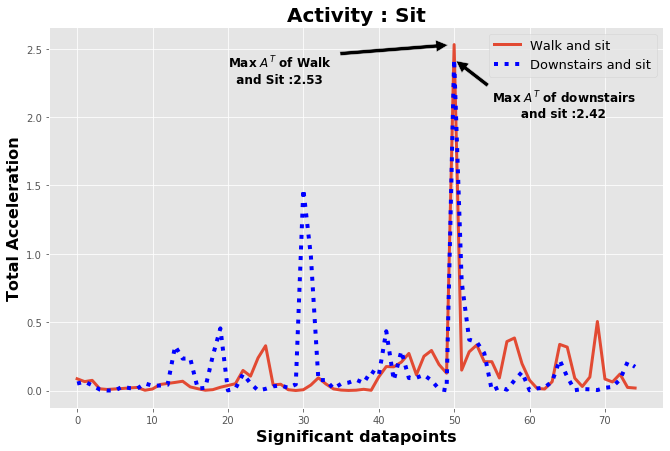

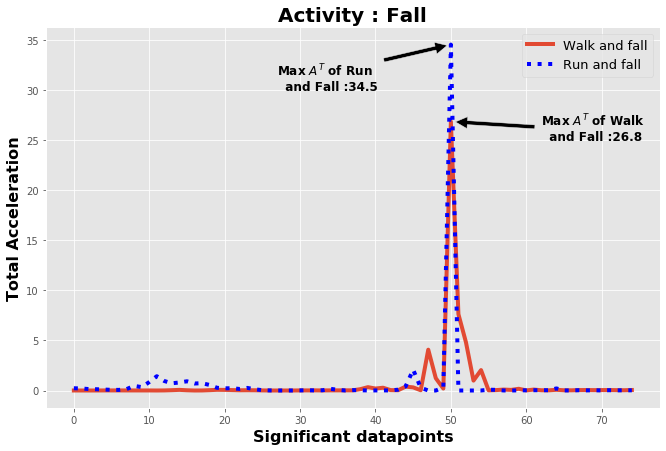

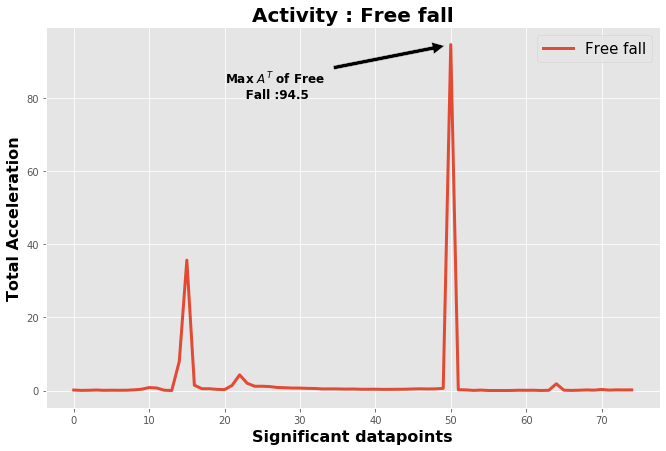

In [3]:
def plot_gen():
    # Sit Situations
    plt.figure(figsize=(11,7))
    max_AT = walkSit[30]['AccelerationT'].idxmax()
    ws = walkSit[30][max_AT - 50:max_AT + 25].reset_index(drop=True)
    plt.plot(ws['AccelerationT'],'-', linewidth=3, label = 'Walk and sit')
    
    Maxval = walkSit[30].loc[walkSit[30]['AccelerationT'].idxmax()]
    Maxval = Maxval['AccelerationT']
    m = str(Maxval)[0:4]
    plt.annotate('Max $A^T$ of Walk \n  and Sit :'+str(m),fontweight = 'bold',fontsize = '12', xy=[50,Maxval],xytext=(20, 2.25),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    max_AT = downSit[31]['AccelerationT'].idxmax()
    ds = downSit[31][max_AT - 50:max_AT + 25].reset_index(drop=True)
    plt.plot(ds['AccelerationT'], ':', linewidth=4,label = 'Downstairs and sit',color = 'blue') 
    
    Maxval = downSit[31].loc[downSit[31]['AccelerationT'].idxmax()]
    Maxval = Maxval['AccelerationT']
    m = str(Maxval)[0:4]
    plt.annotate('Max $A^T$ of downstairs\n       and sit :'+str(m),fontweight = 'bold',fontsize = '12', xy=[50,Maxval],xytext=(55, 2),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.legend(fontsize=13, loc = 0)
    plt.xlabel("Significant datapoints", fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel("Total Acceleration", fontsize=16,fontweight = 'bold').set_color('black')
    plt.title("Activity : Sit",fontsize=20,fontweight = 'bold')
    plt.savefig("Images/Significant_plots/sit.jpeg")
    
    plt.figure(figsize=(11,7))
    max_AT = walkFall[30]['AccelerationT'].idxmax()
    wf = walkFall[30][max_AT - 50:max_AT + 25].reset_index(drop=True)
    plt.plot(wf['AccelerationT'], '-', linewidth=4,label = 'Walk and fall')
    
    Maxval = walkFall[30].loc[walkFall[30]['AccelerationT'].idxmax()]
    Maxval = Maxval['AccelerationT']
    m = str(Maxval)[0:4]
    plt.annotate('Max $A^T$ of Walk \n  and Fall :'+str(m),fontweight = 'bold',fontsize = '12', xy=[50,Maxval],xytext=(62, 25),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    
    max_AT = runFall[1]['AccelerationT'].idxmax()
    rf = runFall[1][max_AT - 50:max_AT + 25].reset_index(drop=True)
    plt.plot(rf['AccelerationT'],':', linewidth=4, label = 'Run and fall',color = 'blue')
    
    Maxval = runFall[1].loc[runFall[1]['AccelerationT'].idxmax()]
    Maxval = Maxval['AccelerationT']
    m = str(Maxval)[0:4]
    plt.annotate('Max $A^T$ of Run \n  and Fall :'+str(m),fontweight = 'bold',fontsize = '12', xy=[50,Maxval],xytext=(27, 30),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    
    plt.legend(fontsize=13, loc = 0)
    plt.xlabel("Significant datapoints", fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel("Total Acceleration", fontsize=16,fontweight = 'bold').set_color('black')
    plt.title("Activity : Fall",fontsize=20,fontweight = 'bold')
    plt.savefig("Images/Significant_plots/fall.jpeg")
    
    plt.figure(figsize=(11,7))
    
    max_AT = freeFall[12]['AccelerationT'].idxmax()
    ff = freeFall[12][max_AT - 50:max_AT + 25].reset_index(drop=True)
    plt.plot(ff['AccelerationT'],'-',ms = '2', linewidth=3, label = 'Free fall') 
    
    Maxval = freeFall[12].loc[freeFall[12]['AccelerationT'].idxmax()]
    Maxval = Maxval['AccelerationT']
    m = str(Maxval)[0:4]
    plt.annotate('Max $A^T$ of Free \n     Fall :'+str(m),fontweight = 'bold',fontsize = '12', xy=[50,Maxval],xytext=(20,80),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.legend(fontsize=15, loc = 0)
    plt.xlabel("Significant datapoints", fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel("Total Acceleration", fontsize=16,fontweight = 'bold').set_color('black')
    plt.title("Activity : Free fall",fontsize=20,fontweight = 'bold')
    plt.savefig("Images/Significant_plots/freefall.jpeg")
    
    
plot_gen()    

# `Stats Generator function`

In [4]:
def stats_generator(df):
    # total max Acceleration
    max_AT = df['AccelerationT'].idxmax()
    
    # 1 sec before and after drop data
    Imp_Data = df[max_AT - 50:max_AT + 25] 
    Imp_Data = pd.DataFrame(Imp_Data)
    
    MeanX = Imp_Data['AccelerationX'].mean()
    MeanY = Imp_Data['AccelerationY'].mean()
    MeanZ = Imp_Data['AccelerationZ'].mean()
    MeanT = Imp_Data['AccelerationT'].mean()
    
    StdX = Imp_Data['AccelerationX'].std()
    StdY = Imp_Data['AccelerationY'].std()
    StdZ = Imp_Data['AccelerationZ'].std()
    StdT = Imp_Data['AccelerationT'].std()
    
    MinX = Imp_Data['AccelerationX'].min()
    MinY = Imp_Data['AccelerationY'].min()
    MinZ = Imp_Data['AccelerationZ'].min()
    MinT = Imp_Data['AccelerationT'].min()
    
    MaxX = Imp_Data['AccelerationX'].max()
    MaxY = Imp_Data['AccelerationY'].max()
    MaxZ = Imp_Data['AccelerationZ'].max()
    MaxT = Imp_Data['AccelerationT'].max()
    
    stat = [{'MeanX':MeanX, 'MeanY':MeanY, 'MeanZ':MeanZ, 'MeanT':MeanT, 
             'StdX': StdX, 'StdY': StdY, 'StdZ': StdZ, 'StdT': StdT,
             'MinX': MinX, 'MinY': MinY, 'MinZ': MinZ, 'MinT': MinT,
             'MaxX':MaxX, 'MaxY':MaxY, 'MaxZ':MaxZ, 'MaxT':MaxT}]
    
    return pd.DataFrame(stat)

# `Walk and Sit Data Transformation`

In [5]:
stat_walkSit = stats_generator(walkSit[0])
for i in range(45):
    stat_walkSit = stat_walkSit.append(stats_generator(walkSit[i + 1]))

In [6]:
stat_walkSit = stat_walkSit.dropna()
stat_walkSit = stat_walkSit.reset_index(drop=True)
stat_walkSit ['Fall'] = 0
# fall 0 mean false i.e. no fall

In [7]:
stat_walkSit.to_csv("Data/Transformed/walkSit.csv", index=False)

# `Walk and Fall Data Transformation`

In [8]:
stat_walkFall = stats_generator(walkFall[0])
for i in range(46):
    stat_walkFall = stat_walkFall.append(stats_generator(walkFall[i + 1]))

In [9]:
stat_walkFall = stat_walkFall.dropna()
stat_walkFall = stat_walkFall.reset_index(drop=True)
stat_walkFall ['Fall'] = 1
# fall 1 mean true i.e. fall

In [10]:
stat_walkFall.to_csv("Data/Transformed/walkFall.csv", index=False)

# `Run and Fall Data Transformation`

In [11]:
stat_runFall = stats_generator(runFall[0])
for i in range(43):
    stat_runFall = stat_runFall.append(stats_generator(runFall[i + 1]))

In [12]:
stat_runFall = stat_runFall.dropna()
stat_runFall = stat_runFall.reset_index(drop=True)
stat_runFall ['Fall'] = 1
# fall 1 mean false i.e. fall

In [13]:
stat_runFall.to_csv("Data/Transformed/runFall.csv", index=False)

# `Down and Sit Data Transformation`

In [14]:
stat_downSit = stats_generator(downSit[0])
for i in range(32):
    stat_downSit = stat_downSit.append(stats_generator(downSit[i + 1]))

In [15]:
stat_downSit = stat_downSit.dropna()
stat_downSit = stat_downSit.reset_index(drop=True)
stat_downSit ['Fall'] = 0
# fall 0 mean false i.e. no fall

In [16]:
stat_downSit.to_csv("Data/Transformed/downSit.csv", index=False)

# `FreeFall Data Transformation`

In [17]:
stat_freeFall = stats_generator(freeFall[0])
for i in range(14):
    stat_freeFall = stat_freeFall.append(stats_generator(freeFall[i + 1]))

In [18]:
stat_freeFall = stat_freeFall.dropna()
stat_freeFall = stat_freeFall.reset_index(drop=True)
stat_freeFall ['Fall'] = 1
# fall 1 mean false i.e. fall

In [19]:
stat_freeFall.to_csv("Data/Transformed/freeFall.csv", index=False)